In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### The Data: Breast_cancer_dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [15]:
cancer['target'][:5]

array([0, 0, 0, 0, 0])

In [16]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [17]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [19]:
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
type(scaled_data)

numpy.ndarray

In [25]:
scaled_data = scaler.transform(df)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)

In [32]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
x_pca = pca.transform(scaled_data)

In [34]:
scaled_data.shape

(569, 30)

In [35]:
x_pca.shape

(569, 5)

In [36]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324])

In [39]:
pca.explained_variance_ratio_ 
## it is giving the % of data captured sum all of this values

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

Text(0, 0.5, 'Second Principal Componet')

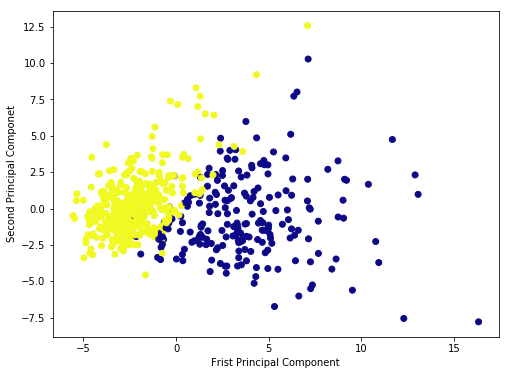

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Frist Principal Component')
plt.ylabel('Second Principal Componet')

In [42]:
len(pca.components_)

5

In [43]:
pca.components_.shape

(5, 30)

In [47]:
df_comp = pd.DataFrame(pca.components_[:,:],columns=cancer['feature_names'])

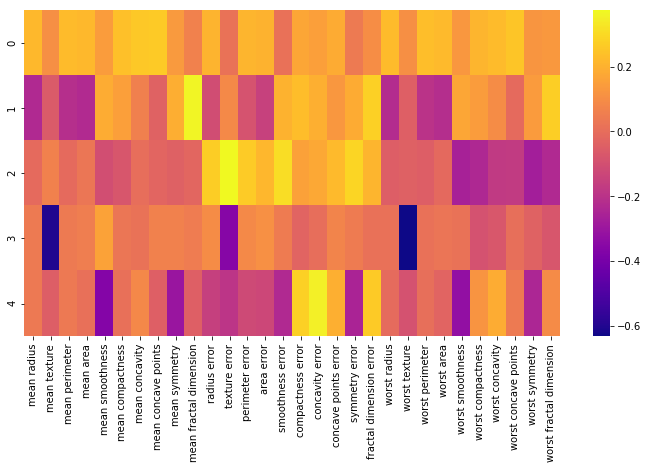

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap= 'plasma')

In [49]:
from sklearn.linear_model import LogisticRegression
LR_scaled = LogisticRegression()
LR_scaled.fit(scaled_data, cancer['target'])

C:\Users\YASHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
LR_scaled.score(scaled_data, cancer['target'])

0.9876977152899824

In [52]:
x_pca[:,0], x_pca[:,1]
LR_pca = LogisticRegression()
LR_pca.fit(scaled_data, cancer['target'])

C:\Users\YASHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
LR_pca.fit(x_pca[:,:2], cancer['target'])
LR_pca.score(x_pca[:,:2], cancer['target'])

C:\Users\YASHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9543057996485061